#### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course.

### Let's first import basic image processing or related libraries.

In [1]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.

# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

### First load an image and visualize it.

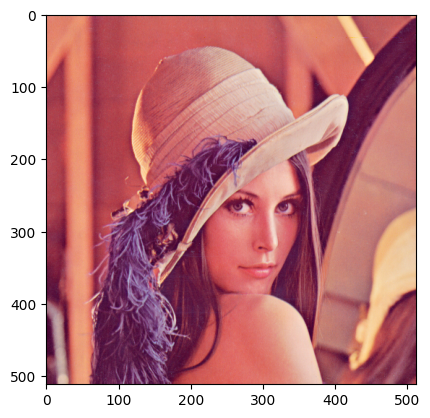

In [2]:
image = plt.imread("lena.png")
plt.imshow(image)

# 1. Image Information

#### It is always good to know basic image details, such as its dimensions, before one proceeds for the experiments.

#### Task1.1 : write code to find image dimension and print it

In [3]:
height, width, channels = image.shape  
print(f"Image Width: {width} pixels")
print(f"Image Height: {height} pixels")
print(f"Image Channels: {channels} pixels")


Image Width: 512 pixels
Image Height: 512 pixels
Image Channels: 3 pixels


### Is this image RGB (no of channels?), gray or binary (intensity range?)? What can you say about aspect ratio (defined as width/height) of this image?

In [4]:
aspect_ratio = width / height
print(f"Aspect Ratio: {aspect_ratio:.2f}")

Aspect Ratio: 1.00


The image has 3 channels indicating it is RGB, and aspect ratio is 1 indicating it is a square image of equal height and width.

#### Task1.2:  Visualization of each channel

#### An RGB image can be decomposed into three channels, Red(R), Green(G), Blue(B). In this subsection, let's visualize each channel separately.

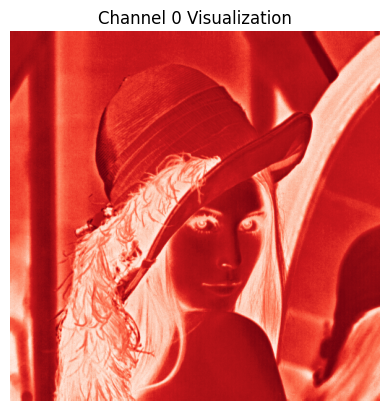

Channel 0: Min Intensity = 0.21176470816135406, Max Intensity = 1.0


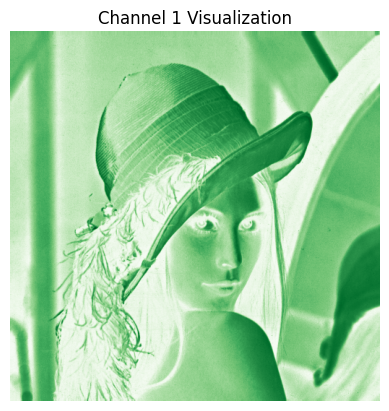

Channel 1: Min Intensity = 0.0117647061124444, Max Intensity = 0.9725490212440491


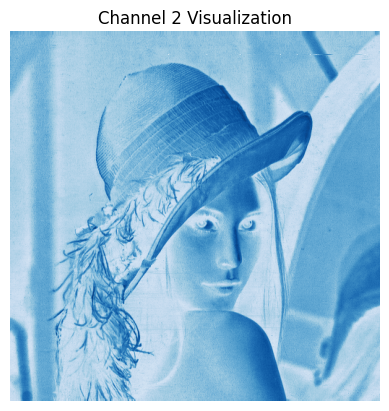

Channel 2: Min Intensity = 0.0313725508749485, Max Intensity = 0.8823529481887817


array([[0.49019608, 0.49019608, 0.52156866, ..., 0.47843137, 0.43137255,
        0.3529412 ],
       [0.49019608, 0.49019608, 0.52156866, ..., 0.47843137, 0.43137255,
        0.3529412 ],
       [0.49019608, 0.49019608, 0.52156866, ..., 0.47843137, 0.43137255,
        0.3529412 ],
       ...,
       [0.23529412, 0.23529412, 0.22745098, ..., 0.32941177, 0.29803923,
        0.30980393],
       [0.22352941, 0.22352941, 0.24313726, ..., 0.30980393, 0.31764707,
        0.31764707],
       [0.22352941, 0.22352941, 0.24313726, ..., 0.30980393, 0.31764707,
        0.31764707]], shape=(512, 512), dtype=float32)

In [10]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    #write your code here

    output = image[:, :, channel]

    cmap_dict = {0: 'Reds', 1: 'Greens', 2: 'Blues'}
    cmap = cmap_dict.get(channel, 'gray')

    plt.imshow(output, cmap=cmap)
    plt.title(f"Channel {channel} Visualization")
    plt.axis("off")
    plt.show()

    min_val, max_val = output.min(), output.max()
    print(f"Channel {channel}: Min Intensity = {min_val}, Max Intensity = {max_val}")

    return output    # 'output' is image's particular channel values

VisualizeChannel(image,0)
VisualizeChannel(image,1)
VisualizeChannel(image,2)

#### Can you also comment on the maximum and minimum intensity values of each channel? What can you say about the range of intensity values?

The intensity values lie between 0 and 1. The picture has more Red than any of the other colours.

# 2. Intensity Manipulations

#### Task2.1: RGB to Gray  

#### We may need a gray image for some of our applications. One can also convert RGB to gray to reduce computational complexity. For this part, we will convert an RGB image to grayscale. Refer this link for explanation:  https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm

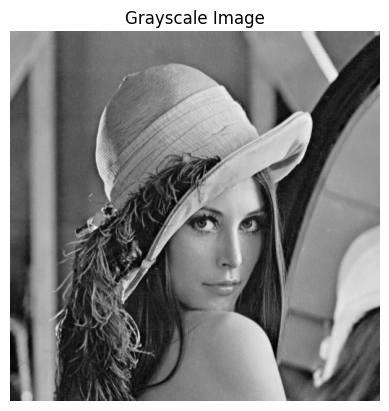

array([[0.6367843 , 0.6367843 , 0.6367059 , ..., 0.66564703, 0.6082353 ,
        0.5031765 ],
       [0.6367843 , 0.6367843 , 0.6367059 , ..., 0.66564703, 0.6082353 ,
        0.5031765 ],
       [0.6367843 , 0.6367843 , 0.6367059 , ..., 0.66564703, 0.6082353 ,
        0.5031765 ],
       ...,
       [0.16635294, 0.16635294, 0.1957255 , ..., 0.4086667 , 0.3924706 ,
        0.38576472],
       [0.1719608 , 0.1719608 , 0.21372549, ..., 0.40662748, 0.41215685,
        0.42380393],
       [0.1719608 , 0.1719608 , 0.21372549, ..., 0.40662748, 0.41215685,
        0.42380393]], shape=(512, 512), dtype=float32)

In [12]:
def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result

    # using the weighted grayscale conversion given in the link
    gray = 0.3 * image[:, :, 0] + 0.59 * image[:, :, 1] + 0.11 * image[:, :, 2]

    # Display the grayscale image
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")
    plt.show()

    return gray       #'gray' is grayscale image, converted from RGB image

RGB2Gray(image)

We can also convert a gray image to a binary image. For task2.2, consider a gray image as input (you may take the output from task2.1 as input).

$$
I(x, y) = 
\begin{cases} 
1 & \text{if } I(x, y) \geq T \\
0 & \text{if } I(x, y) < T & \text{where T is threshold}
\end{cases}
$$

Though there are proper methods (such as the Otsu method) to find a suitable $T$, we will not go into details of those algorithms and randomly select T values and visualize the result.

#### Task2.2 : Gray to Binary

##### Before you proceed to code, Can you comment on the valid range of T? (Hint: Task1.2)

Since the intensity values lie between 0 and 1, we could use T = 0.5, alternatively we could also use the mean values of the intensitites.

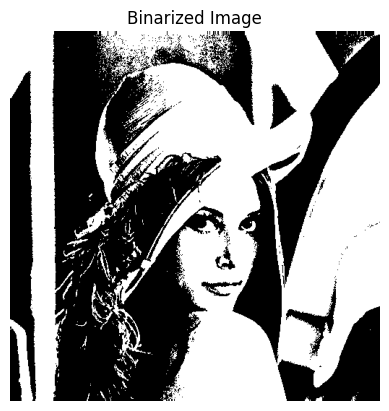

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(512, 512))

In [19]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''

    #check if image is RGB if yes, convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        #code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        gray = 0.3 * image[:, :, 0] + 0.59 * image[:, :, 1] + 0.11 * image[:, :, 2]

    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bimg = np.where(gray >= T, 1, 0)

    #write code to visualize the resultant image
    plt.imshow(bimg, cmap='gray')
    plt.title("Binarized Image")
    plt.axis("off")
    plt.show()


    return bimg

Gray2Binary(image, 0.5)


An image is nothing but a matrix. Hence one can perform all kinds of mathematical operations on an image just like a matrix.

To convince ourselves with the above statement, let's crop a section of a gray image, print its value, and perform some mathematical operations. For a better data display, we will cut only 5*5 areas of the gray image.

####  Task2.3:  Crop a 5*5 section of a gray image

In [20]:
def ImageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5)
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # write code to check if input is RGB , if its RGB convert it to gray
    flag = len(image.shape)
    if flag == 3:       
        gray = 0.3 * image[:, :, 0] + 0.59 * image[:, :, 1] + 0.11 * image[:, :, 2]

    # write code to select 5*5 rectangular patch defined as above (say it 'patch')
    patch = gray[r0:r0+5, c0:c0+5]

    # visualize patch and print its value
    plt.imshow(patch, cmap='gray')
    plt.title("Cropped Patch")
    plt.axis("off")
    plt.show()

    return patch

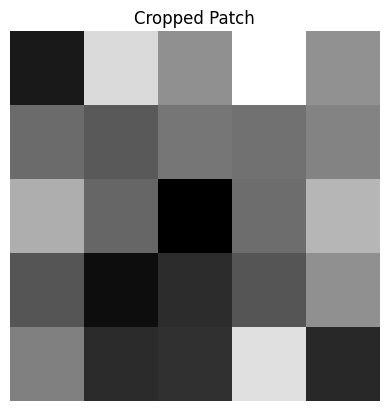

[[0.6143922  0.6405882  0.6305883  0.6457647  0.63070583]
 [0.6255686  0.62305886 0.6270588  0.6263921  0.6287451 ]
 [0.6347059  0.62486273 0.61086273 0.62584317 0.63580394]
 [0.6224706  0.6126667  0.6170588  0.6224707  0.630549  ]
 [0.62835294 0.61678433 0.6175686  0.6414118  0.6165491 ]]


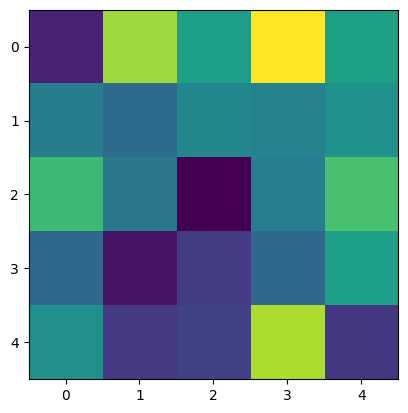

In [21]:
r0=4
c0=5
patch = ImageCrop(image,r0,c0)
print(patch)
plt.imshow(patch)

Now you have 5*5 patch and you know its values too. Can you try


1. multiplying patch by 0.5
2. multiplying patch by 2
3. create another random 5*5 patch (numpy array) and add/subtract it to the patch

Does it follow matrix addition/subtraction and multiplication rules? You can also play around with other matrix operations.

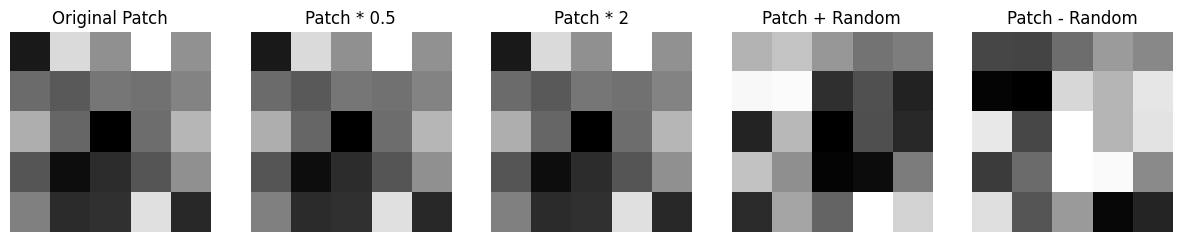

Original Patch:
 [[0.6143922  0.6405882  0.6305883  0.6457647  0.63070583]
 [0.6255686  0.62305886 0.6270588  0.6263921  0.6287451 ]
 [0.6347059  0.62486273 0.61086273 0.62584317 0.63580394]
 [0.6224706  0.6126667  0.6170588  0.6224707  0.630549  ]
 [0.62835294 0.61678433 0.6175686  0.6414118  0.6165491 ]]
Patch * 0.5:
 [[0.3071961  0.3202941  0.31529415 0.32288235 0.31535292]
 [0.3127843  0.31152943 0.3135294  0.31319606 0.31437254]
 [0.31735295 0.31243137 0.30543137 0.31292158 0.31790197]
 [0.3112353  0.30633336 0.3085294  0.31123534 0.3152745 ]
 [0.31417647 0.30839217 0.3087843  0.3207059  0.30827454]]
Patch * 2:
 [[1.2287844 1.2811764 1.2611766 1.2915294 1.2614117]
 [1.2511373 1.2461177 1.2541176 1.2527843 1.2574902]
 [1.2694118 1.2497255 1.2217255 1.2516863 1.2716079]
 [1.2449412 1.2253335 1.2341176 1.2449414 1.261098 ]
 [1.2567059 1.2335687 1.2351372 1.2828236 1.2330981]]
Patch + Random Patch:
 [[1.26933604 1.32897268 1.17019271 1.04217284 1.07835029]
 [1.51347683 1.52423767 0.80

In [23]:
def NormalizePatch(patch):
    '''
    Normalize the patch to have values between 0 and 1 using min-max normalization.
    patch: 5x5 numpy array
    '''
    min_patch = np.min(patch)
    max_patch = np.max(patch)
    normalized_patch = (patch - min_patch) / (max_patch - min_patch)
    return normalized_patch

# 1. Multiply the patch by 0.5
patch_mult_05 = patch * 0.5

# 2. Multiply the patch by 2
patch_mult_2 = patch * 2

# 3. Create another random 5x5 patch and add it to the original patch
random_patch = np.random.rand(5, 5)  # Random values between 0 and 1
patch_add = patch + random_patch  # Matrix addition

# 4. Subtract the random 5x5 patch from the original patch
patch_subtract = patch - random_patch  # Matrix subtraction

# Normalize all resulting patches to have values between 0 and 1
patch_mult_05_normalized = NormalizePatch(patch_mult_05)
patch_mult_2_normalized = NormalizePatch(patch_mult_2)
patch_add_normalized = NormalizePatch(patch_add)
patch_subtract_normalized = NormalizePatch(patch_subtract)

# Visualize all patches
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Original patch
axes[0].imshow(patch, cmap='gray')
axes[0].set_title("Original Patch")
axes[0].axis('off')

# Multiplied by 0.5
axes[1].imshow(patch_mult_05_normalized, cmap='gray')
axes[1].set_title("Patch * 0.5")
axes[1].axis('off')

# Multiplied by 2
axes[2].imshow(patch_mult_2_normalized, cmap='gray')
axes[2].set_title("Patch * 2")
axes[2].axis('off')

# Added random patch
axes[3].imshow(patch_add_normalized, cmap='gray')
axes[3].set_title("Patch + Random")
axes[3].axis('off')

# Subtracted random patch
axes[4].imshow(patch_subtract_normalized, cmap='gray')
axes[4].set_title("Patch - Random")
axes[4].axis('off')

plt.show()

# Print the patch values and verify the operations
print("Original Patch:\n", patch)
print("Patch * 0.5:\n", patch_mult_05)
print("Patch * 2:\n", patch_mult_2)
print("Patch + Random Patch:\n", patch_add)
print("Patch - Random Patch:\n", patch_subtract)


We see that multiplying by 0.5 decreases the intensity, multiplying by 2 increases the intensity. It follows the rules of matrix multiplication, subtraction and addition.

#### Task2.4: Uniform Brightness Scaling

Hopefully, you are convinced that an image is a matrix. 

Hence we can perform multiplication/division or addition/subtraction operations.

These operations will change the brightness value of the image; can make an image brighter or darker depending on the multiplying/scaling factor. 

For this task, let's change the image brightness uniformly. Consider scale to be 0.3,0.5,1,2 for four different cases. What is your observation?

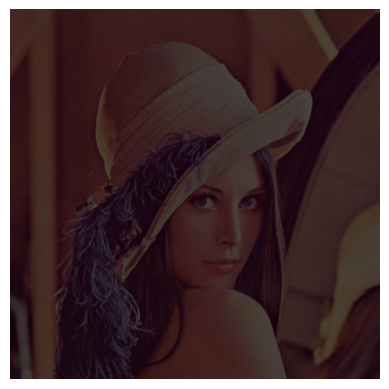

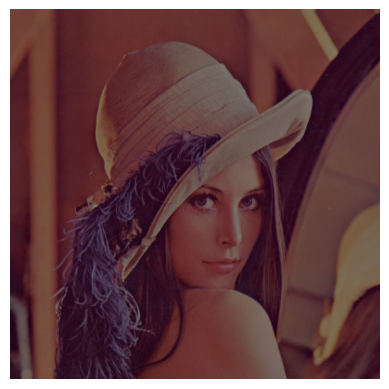

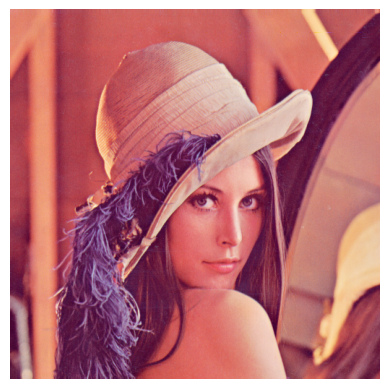

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.023529412..2.0].


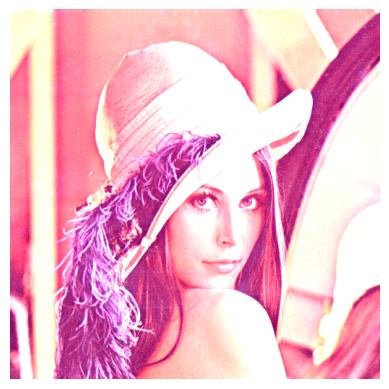

In [28]:
def UniformBrightScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    #write your code here
    output = (image * scale)  # Multiplying the pixel values by scale
    
    # Display the resultant image
    plt.imshow(output)  # Convert to uint8 for proper display
    plt.axis('off')  # Hide the axis for better visualization
    plt.show()

    return output        #replace output with the variable name you used for final result

scales=[0.3,0.5,1,2]
for scale in scales:
    UniformBrightScaling(image,scale)

In [9]:
## Image normalization

def normalize_rgb_channels_min_max(image):
    # Extract individual channels
    r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]

    # Apply min-max normalization to each channel
    r_normalized = (r - r.min()) / (r.max() - r.min())
    g_normalized = (g - g.min()) / (g.max() - g.min())
    b_normalized = (b - b.min()) / (b.max() - b.min())

    # Stack the normalized channels back into a single image
    normalized_image = np.stack((r_normalized, g_normalized, b_normalized), axis=-1)

    return normalized_image

# 3. Image Filtering

In this section, you will perform some of the image filtering techniques.

Convolution is one of the most widely used operations for images. 

Convolution can be used as a feature extractor; different kernel results in various types of features.


Refer https://en.wikipedia.org/wiki/Kernel_(image_processing) to see few examples of kernel.


In [29]:
def feature_extractor(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''
    # first convert RGB to gray if input is RGB image

    l = len(image.shape)

    if l == 3:
        #write code to convert it to gray scale 
        image = 0.3 * image[:,:,0] + 0.59 * image[:,:,1] + 0.11 * image[:,:,2]
    
    # write code to create a zero array of size (r,c) which will store the resultant value at specific pixel locations (say it output)
    r, c = image.shape
    output = np.zeros_like(image)

    #write code to create a zero array with size (r+2,c+2) if (r,c) is the gray image size.  (say it pad_img)
    pad_img = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    #now copy gray image to above created array at location starting from (1,1)


    #write code to convolve the image
    for row in range():     # use appropiate range values for row and col
        for col in range():
            # select 3*3 patch with center at (row,col), flatten it. flatten the kernel and take dot product between both (or directly take element wise multiplication and sum it)
            # store this scalar value to output matrix with starting location (0,0)         (alternatively one could also create a list and reshape it to output size)
            patch = pad_img[row:row+3, col:col+3]
            output[row, col] = np.sum(patch * kernel)



    return output

## Note that the steps described above are to help you get started. You can follow other valid steps too. 
Result from all of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

for the above case, consider all 3 * 3 kernels from https://en.wikipedia.org/wiki/Kernel_(image_processing). 

What was your observation with different kernels? 

You can also play with other kernels, take any 3*3 matrix of your choice, convolve it with a gray image and see if it extracts some image features. 

(You should be able to correlate your learning from this experiment during CNN lectures)

# 4.Geometric Transformation

In all of the above cases, you performed operations on the pixel value, i.e., photometric transformations. Now for this section, you will apply the transformations on pixel locations, i.e., spatial transformations
It is advised to go through below mentioned references(in order) before proceeding to this section:
1. https://www.youtube.com/watch?v=7liGDs9Vf-I&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=6
2. https://www.youtube.com/watch?v=FleSNIZp2kc&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=8
3. https://www.youtube.com/watch?v=NYkMk17J9O0&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=9
4. https://www.youtube.com/playlist?list=PLfZZTc8qI7Hc7n4Y2xZcfPbsd5K6eMhPE (L09-L13)

#### Task4.1: Image Rotation (In-plane)

Write a function which rotates an image by 10 degrees in anticlockwise direction. (You can use inbuit functions for this, however it is encouraged to write code from scratch)

In [31]:
def rotate_image(image, angle):
    # center of the image
    center_x, center_y = image.shape[1] // 2, image.shape[0] // 2
    angle_rad = np.radians(angle)
    
    # rotation matrix for anticlockwise rotation
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad), np.cos(angle_rad)]
    ])
    
    # output image 
    rotated_image = np.zeros_like(image)

    # Iterate through each pixel in the output image and apply the inverse transformation
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            # translate pixel position relative to the center
            x, y = col - center_x, row - center_y
            # multiply rotation matrix to find the new position
            new_x, new_y = np.dot(rotation_matrix, [x, y])
            # move back to original coordinates
            new_col, new_row = int(new_x + center_x), int(new_y + center_y)
            if 0 <= new_row < image.shape[0] and 0 <= new_col < image.shape[1]:
                rotated_image[new_row, new_col] = image[row, col]
    
    return rotated_image